# Coursework C: MNIST Classification Using Principle Component Analysis
## Archie Wilson, Student Number: 22008424
The following notebook aims to investigate how principle component analysis (PCA) affects a neural network trained and tested with MNIST handwritten digits. The model will first be trained using the original clean MNIST dataset and then tested on images that have been decomposed into their N-best PCA components. New neural networks will then be trained on the 100-best and 20-best PCA components, and the performance of each NN will be compared with the one trained on the original clean dataset.

In [1]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl
from scipy import linalg

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras

# Set figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0]    # Figure size in inches
mpl.rcParams['figure.dpi']=200    # 200 dots per inch

# Train Neural Network on MNIST

In [2]:
# Import the MNIST dataset from Keras
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalise the values in the dataset
train_images=train_images/255.0
test_images=test_images/255.0

In [3]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(28,28)),    # 28x28 image in input layer
    keras.layers.Flatten(),    # Convert 28x28 image into a 784-element vector
    keras.layers.Dense(50,activation='relu'),    # 50 nodes in hidden layer
    keras.layers.Dense(10)    # 10 nodes in output layer for digits 0-9
])

# Compile the neural network
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])    # Use cross-entropy loss function and stochastic gradient descent

# Training the neural network
history=model.fit(train_images, train_labels, batch_size=100, epochs=30)

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6946 - loss: 0.9125
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9236 - loss: 0.2637
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9317 - loss: 0.2298
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9369 - loss: 0.2086
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9420 - loss: 0.1939
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9467 - loss: 0.1791
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9478 - loss: 0.1755
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9537 - loss: 0.1600
Epoch 9/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9546 - loss: 0.1532
Epoch 10/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9564 - loss: 0.1480
Epoch 11/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9575 - loss: 0.1425
Epoch 12/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

In [4]:
# Evaluate the model and display accuracy on test images
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9585 - loss: 0.1778

Test accuracy: 0.9585000276565552


# Decompose MNIST Training Set into PCA Components

In [5]:
print("train_images.shape: ",np.shape(train_images))

# Reshape the training images
X=np.reshape(train_images,(60000,784))
print("X.shape:",np.shape(X))

# Compute the mean and center the training data
mu=np.mean(X,axis=0)
x=X-mu

# Make the covaraince matrix
rho=np.cov(x,rowvar=False)
print("rho.shape:",np.shape(rho))

# Get the eigenvalues and eigenvectors
vals,vecs=linalg.eigh(rho)

# vals is a 1-D array of the eigenvalues in ascending order, vecs is a columnwise array of the normalised
# eigenvectors such that vecs[:,i] is the eigenvector corresponding to vals[i]
print("vecs.shape:",np.shape(vecs))
print("vals.shape:",np.shape(vals))

# Reorder the eigenvalues and eigenvectors so that the largest element is first
vecs=np.flip(vecs)
vals=np.flip(vals)

train_images.shape:  (60000, 28, 28)
X.shape: (60000, 784)
rho.shape: (784, 784)
vecs.shape: (784, 784)
vals.shape: (784,)


# Using the N-Best PCA Components to Make a New Testing Dataset



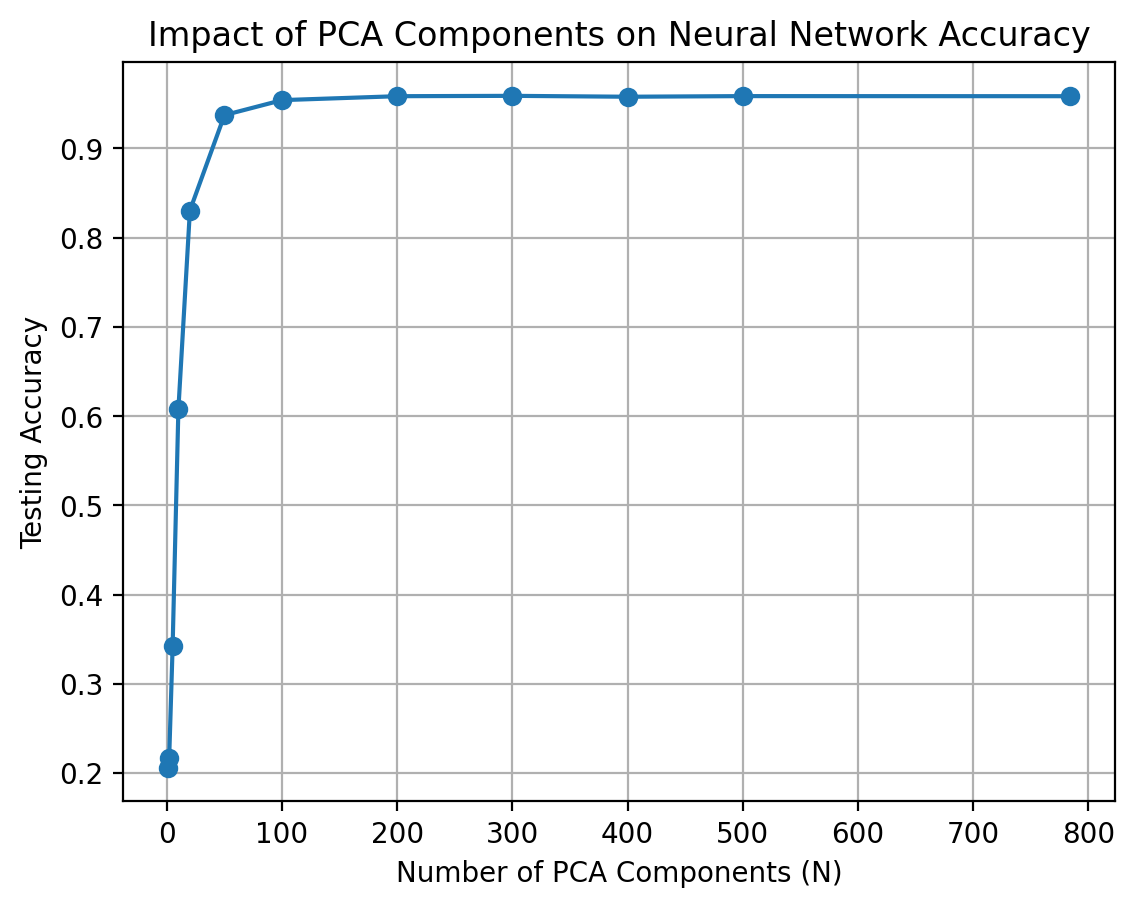

In [6]:
# Center the testing data
x_test = np.reshape(test_images,(10000,784)) - mu

# Store accuracy results
accuracies = []

# Calculate the projection matrix
P=np.dot(x_test,vecs)

# Number of PCA components used to test the model
n_best_components = [1, 2, 5, 10, 20, 50, 100, 200, 300, 400, 500, 784]

# Iterate to test model on different numbers of PCA components
for n in n_best_components:
  newImage_n = (np.dot(P[:,0:n],vecs.T[0:n,:]))+mu    # Use first n components
  test_loss, test_acc = model.evaluate(np.reshape(newImage_n,(10000,28,28)), test_labels, verbose=0)    # Evaluate model on different PCA components
  accuracies.append(test_acc)

# Plot N vs Testing Accuracy
plt.plot(n_best_components, accuracies, marker='o', linestyle='-')
plt.xlabel("Number of PCA Components (N)")
plt.ylabel("Testing Accuracy")
plt.title("Impact of PCA Components on Neural Network Accuracy")
plt.grid(True)
plt.show()

# Retraining the Neural Network with the 100-Best PCA Components

In [7]:
# Center the training data and calculate the projection matrix
x_train_100 = np.reshape(train_images,(60000,784)) - mu
P_train = np.dot(x_train_100, vecs)

# Reconstruct the images using only the top 100 components
x_train_100_reconstructed = np.dot(P_train[:, :100], vecs.T[:100, :]) + mu
new_train_images_100 = np.reshape(x_train_100_reconstructed,(60000,28,28))

# Define the neural network model
model_100 = keras.Sequential([
    keras.layers.Input(shape=(28,28)),    # 28x28 image in input layer
    keras.layers.Flatten(),    # Convert 28x28 image into a 784-element vector
    keras.layers.Dense(50,activation='relu'),    # 50 nodes in hidden layer
    keras.layers.Dense(10)    # 10 nodes in output layer for digits 0-9
])

# Compile the neural network
model_100.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])    # Use cross-entropy loss function and stochastic gradient descent

# Training the neural network
history=model_100.fit(new_train_images_100, train_labels, batch_size=100, epochs=30)

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7246 - loss: 0.8340
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9329 - loss: 0.2297
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9401 - loss: 0.1994
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9447 - loss: 0.1858
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9474 - loss: 0.1766
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9533 - loss: 0.1589
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9567 - loss: 0.1461
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9568 - loss: 0.1419
Epoch 9/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9614 - loss: 0.1284
Epoch 10/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9607 - loss: 0.1330
Epoch 11/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9634 - loss: 0.1216
Epoch 12/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

In [8]:
# Evaluate the model and display accuracy on test images
test_loss, test_acc = model_100.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9613 - loss: 0.1476

Test accuracy: 0.9613000154495239


# Using the N-Best PCA Components as a Testing Dataset for the 100-Best PCA Neural Network

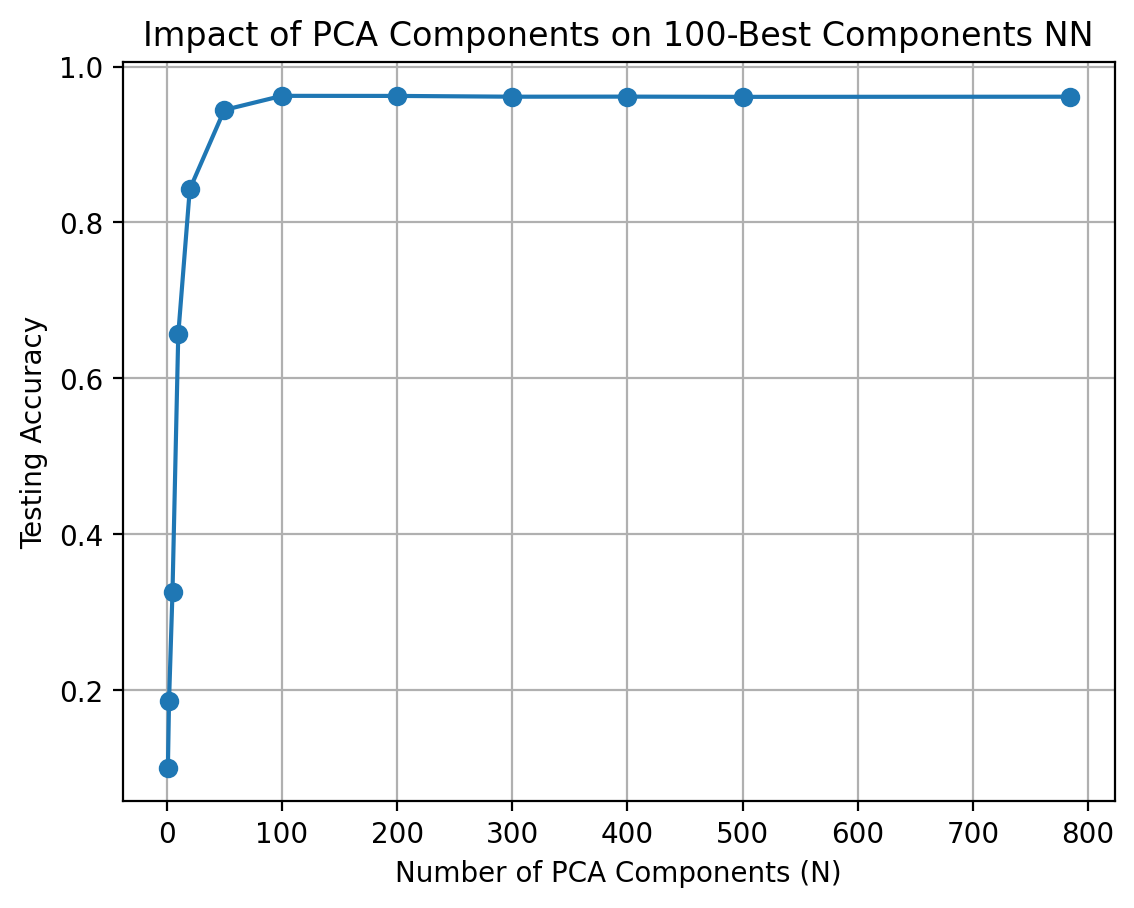

In [9]:
# Reshape and center the testing data
x_test = np.reshape(test_images,(10000,784)) - mu

# Store accuracy results
accuracies_100 = []

# Calculate the projection matrix
P=np.dot(x_test,vecs)

# Number of PCA components used to test the model
n_best_components = [1, 2, 5, 10, 20, 50, 100, 200, 300, 400, 500, 784]

# Iterate to test model on different numbers of PCA components
for n in n_best_components:
  newImage_n = (np.dot(P[:,0:n],vecs.T[0:n,:]))+mu    # Use first n components
  test_loss, test_acc = model_100.evaluate(np.reshape(newImage_n,(10000,28,28)), test_labels, verbose=0)    # Evaluate model on different PCA components
  accuracies_100.append(test_acc)

# Plot N vs Testing Accuracy
plt.plot(n_best_components, accuracies_100, marker='o', linestyle='-')
plt.xlabel("Number of PCA Components (N)")
plt.ylabel("Testing Accuracy")
plt.title("Impact of PCA Components on 100-Best Components NN")
plt.grid(True)
plt.show()

# Retraining the Neural Network with the 20-Best PCA Components

In [14]:
# Center the training data and calculate the projection matrix
x_train_20 = np.reshape(train_images,(60000,784)) - mu
P_train = np.dot(x_train_20, vecs)

# Reconstruct the images using only the top 20 components
x_train_20_reconstructed = np.dot(P_train[:, :20], vecs.T[:20, :]) + mu
new_train_images_20 = np.reshape(x_train_20_reconstructed,(60000,28,28))

# Define the neural network model
model_20 = keras.Sequential([
    keras.layers.Input(shape=(28,28)),    # 28x28 image in input layer
    keras.layers.Flatten(),    # Convert 28x28 image into a 784-element vector
    keras.layers.Dense(50,activation='relu'),    # 50 nodes in hidden layer
    keras.layers.Dense(10)    # 10 nodes in output layer for digits 0-9
])

# Compile the neural network
model_20.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              metrics=['accuracy'])    # Use cross-entropy loss function and stochastic gradient descent

# Training the neural network
history=model_20.fit(new_train_images_20, train_labels, batch_size=100, epochs=30)

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6498 - loss: 1.0645
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8475 - loss: 0.5013
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8752 - loss: 0.4152
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8847 - loss: 0.3831
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8863 - loss: 0.3798
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8891 - loss: 0.3682
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8911 - loss: 0.3621
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8958 - loss: 0.3520
Epoch 9/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8911 - loss: 0.3622
Epoch 10/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8962 - loss: 0.3484
Epoch 11/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8956 - loss: 0.3479
Epoch 12/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

In [15]:
# Evaluate the model and display accuracy on test images
test_loss, test_acc = model_20.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9056 - loss: 0.3270

Test accuracy: 0.9056000113487244


# Using the N-Best PCA Components as a Testing Dataset for the 20-Best PCA Neural Network

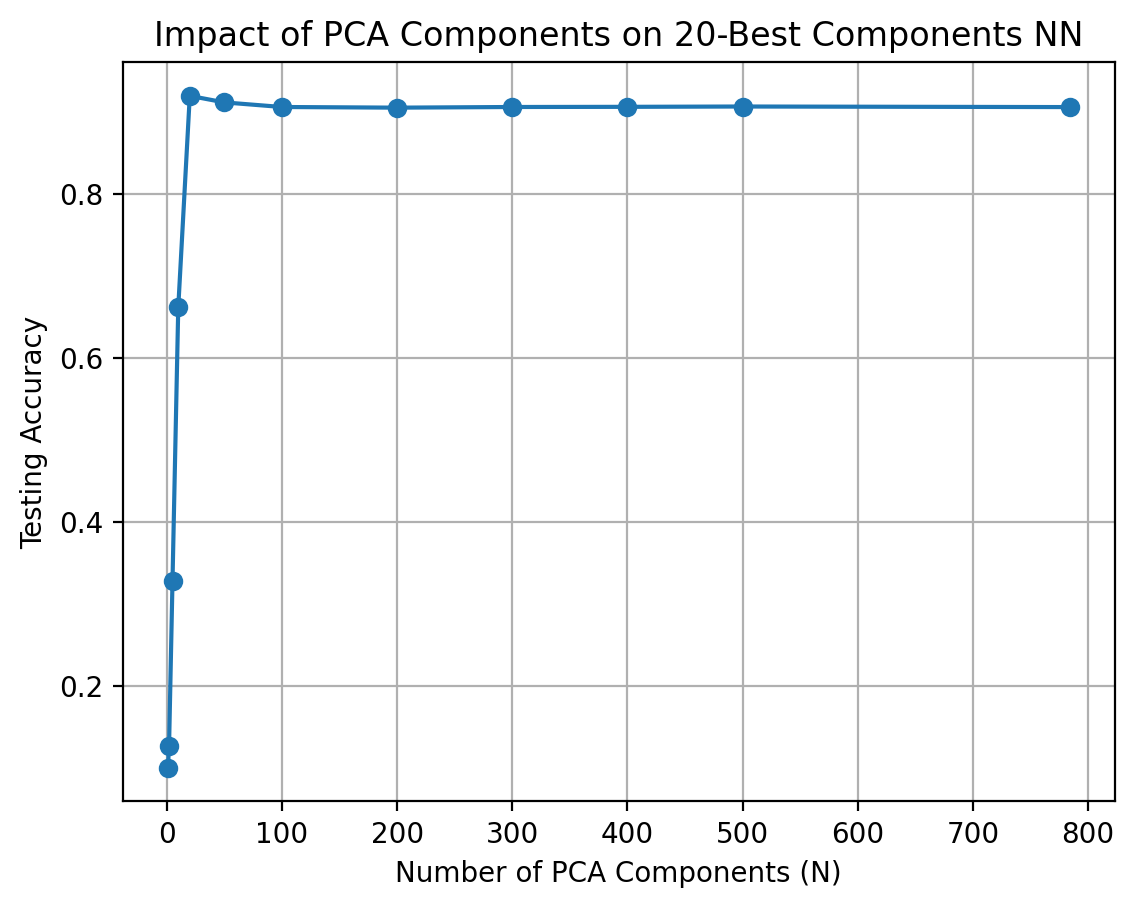

In [16]:
# Center the testing data
x_test = np.reshape(test_images,(10000,784)) - mu

# Store accuracy results
accuracies_20 = []

# Calculate the projection matrix
P=np.dot(x_test,vecs)

# Number of PCA components used to test the model
n_best_components = [1, 2, 5, 10, 20, 50, 100, 200, 300, 400, 500, 784]

# Iterate to test model on different numbers of PCA components
for n in n_best_components:
  newImage_n = (np.dot(P[:,0:n],vecs.T[0:n,:]))+mu    # Use first n components
  test_loss, test_acc = model_20.evaluate(np.reshape(newImage_n,(10000,28,28)), test_labels, verbose=0)    # Evaluate model on different PCA components
  accuracies_20.append(test_acc)

# Plot N vs Testing Accuracy
plt.plot(n_best_components, accuracies_20, marker='o', linestyle='-')
plt.xlabel("Number of PCA Components (N)")
plt.ylabel("Testing Accuracy")
plt.title("Impact of PCA Components on 20-Best Components NN")
plt.grid(True)
plt.show()

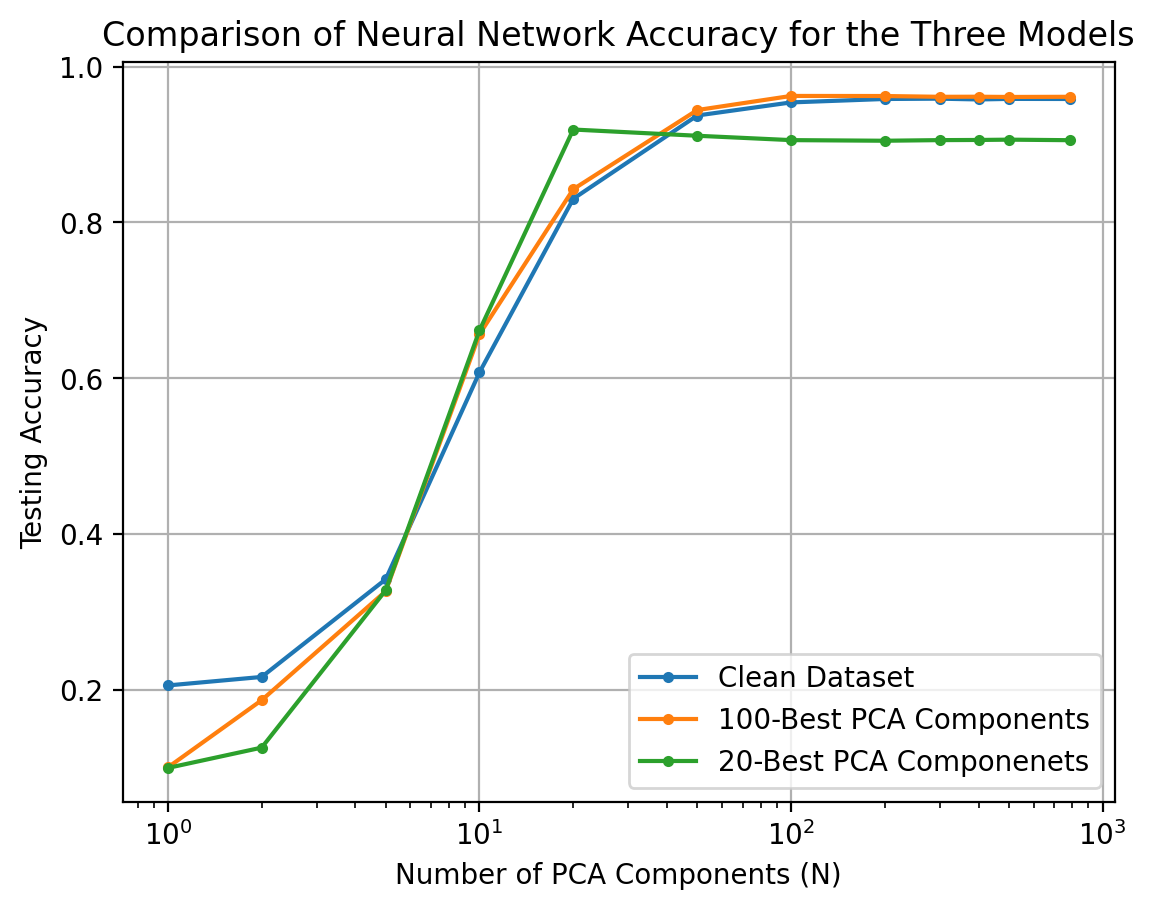

In [17]:
# Plot all three models together to compare accuracy
plt.plot(n_best_components, accuracies, marker='.', linestyle='-', label='Clean Dataset')
plt.plot(n_best_components, accuracies_100, marker='.', linestyle='-', label='100-Best PCA Components')
plt.plot(n_best_components, accuracies_20, marker='.', linestyle='-', label='20-Best PCA Componenets')
plt.xlabel("Number of PCA Components (N)")
plt.ylabel("Testing Accuracy")
plt.title("Comparison of Neural Network Accuracy for the Three Models")
plt.grid(True)
plt.xscale('log')    # Use a log x-axis to make the difference between the models clearer
plt.legend()
plt.show()

The model trained on the clean dataset is the most accurate for just one or two components used but is overtaken by the model trained on the 20-best components. This 20-best component model then peaks in accuracy when it is tested on images that also only have 20 PCA components and then slowly declines in accuracy over the next 764 components used. The model trained on the 100-best components peaks in accuracy with images that also use 100 components and then continues to be the best performing model. This is most likely because PCA highlights the most essential features of the images through dimensionality reduction and filters out the less important details such as slight variations in the handwritten digits. The model trained on the clean dataset didn't get significantly more accurate after being tested on images that used 100 PCA components, so this number might be close to the optimal number of PCA components needed to classify the MNIST images with the highest accuracy.